In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kaggle as k
import geographic_test as gt
%matplotlib inline

In [2]:
#train = pd.read_csv("train_condense_wild_soil.csv")
train = pd.read_csv("test_condense_wild_soil.csv")
train2 = train.loc[train.Wilderness_Area == 2]
trial = train2.reset_index()
gptrain = gt.GeoParser(trial, 2500)
#gptrain.iterate_cohorts()

#train = pd.read_csv("train_condense_wild_soil.csv")
#train.set_index('Id', inplace=True, drop=False)
#train12 = train[(train.Cover_Type == 1) | (train.Cover_Type == 2)]

#test = pd.read_csv("test_condense_wild_soil.csv")

674
Cohort 0, length 39
Cohort 1, length 37
Cohort 2, length 28
Cohort 3, length 92
Cohort 4, length 13
Cohort 5, length 246
Cohort 6, length 249
Cohort 7, length 62
Cohort 8, length 323
Cohort 9, length 76
Cohort 10, length 578
Cohort 11, length 254
Cohort 12, length 130
Cohort 13, length 47
Cohort 14, length 29
Cohort 15, length 76
Cohort 16, length 470
Cohort 17, length 53
Cohort 18, length 89
Cohort 19, length 124
Cohort 20, length 127
Cohort 21, length 106
Cohort 22, length 40
Cohort 23, length 221
Cohort 24, length 26
Cohort 25, length 60
Cohort 26, length 30
Cohort 27, length 657
Cohort 28, length 91
Cohort 29, length 50
Cohort 30, length 249
Cohort 31, length 301
Cohort 32, length 203
Cohort 33, length 529
Cohort 34, length 509
Cohort 35, length 220
Cohort 36, length 240
Cohort 37, length 527
Cohort 38, length 42
Cohort 39, length 18
Cohort 40, length 93
Cohort 41, length 159
Cohort 42, length 177
Cohort 43, length 15
Cohort 44, length 68
Cohort 45, length 27
Cohort 46, length 

In [4]:
import time

In [12]:
a = time.clock()
b = 0
for i in range(10000000):
    b += i
print time.clock() - a

3.9900133216


In [ ]:
len(gptrain.cohorts)


In [ ]:
gptrain.iterate_cohorts()

starting cohort of length 39
Optimization terminated successfully.
         Current function value: 8075.076054
         Iterations: 370
         Function evaluations: 371
         Gradient evaluations: 371
Optimization terminated successfully.
         Current function value: 8075.076054
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
FAILED to find good fit for cohort of length 39
starting cohort of length 37
Optimization terminated successfully.
         Current function value: 3.540441
         Iterations: 173
         Function evaluations: 174
         Gradient evaluations: 174
Optimization terminated successfully.
         Current function value: 3.540441
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
SUCCESS at fitting cohort of length 37
starting cohort of length 28
Optimization terminated successfully.
         Current function value: 166536.173185
         Iterations: 68
         Function evalu

In [29]:
#gptrain.fixed_points[6]
points = gptrain.automate_cohort_matching()


AttributeError: 'NoneType' object has no attribute 'index'

In [ ]:
%debug

> d:\workspace\data\kaggle forest cover\geographic_test.py(182)add_fixed_points()
    181     def add_fixed_points(self, fp_set):
--> 182         #fp_set should be set of fire, water, road fixed points
    183         fixed_point_difference_threshold = 10 #if fixed points of same type are within difference threshold of

ipdb> up
> d:\workspace\data\kaggle forest cover\geographic_test.py(202)automate_cohort_matching()
    201         #tricky since additional checking would need to be done to ensure the fixed points were the same
--> 202         self.init_fixed_points()
    203         joined_points = self.cohorts[self.good_cohorts[0]]

ipdb> self.good_cohorts[0]
*** AttributeError: GeoParser instance has no attribute 'good_cohorts'
ipdb> self.good_cohorts
*** AttributeError: GeoParser instance has no attribute 'good_cohorts'
ipdb> good_cohorts
*** NameError: name 'good_cohorts' is not defined
ipdb> gptrain.good_cohorts
*** NameError: name 'gptrain' is not defined


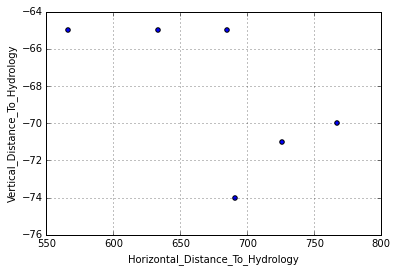

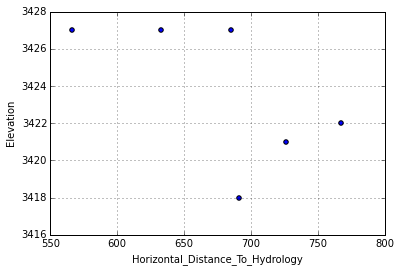

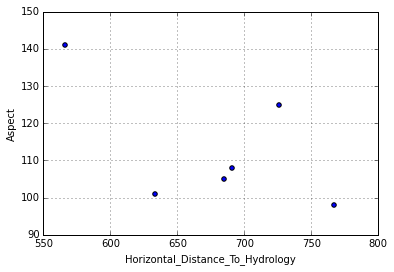

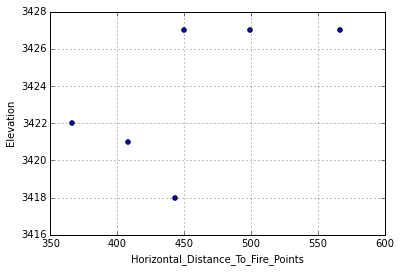

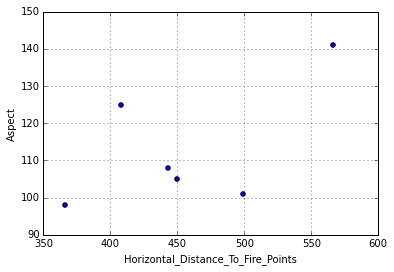

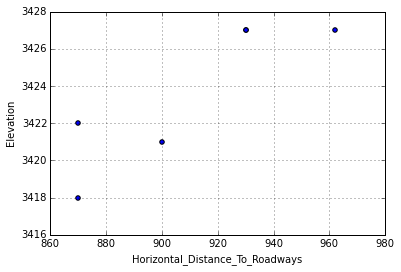

In [3]:
i=10
gptrain.current_cohort = gptrain.cohorts[i]
gptrain.current_cohort.plot('Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', kind='scatter')
gptrain.current_cohort.plot('Horizontal_Distance_To_Hydrology', 'Elevation', kind='scatter')
gptrain.current_cohort.plot('Horizontal_Distance_To_Hydrology', 'Aspect', kind='scatter')
gptrain.current_cohort.plot('Horizontal_Distance_To_Fire_Points', 'Elevation', kind='scatter')
gptrain.current_cohort.plot('Horizontal_Distance_To_Fire_Points', 'Aspect', kind='scatter')
gptrain.current_cohort.plot('Horizontal_Distance_To_Roadways', 'Elevation', kind='scatter')

In [4]:
gptrain.current_cohort = gptrain.cohorts[i]
p, fp, cost = gptrain.bgfs_automate()
print cost

Optimization terminated successfully.
         Current function value: 0.009260
         Iterations: 115
         Function evaluations: 121
         Gradient evaluations: 121
Optimization terminated successfully.
         Current function value: 0.009260
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
0.079338958131


In [5]:
indices = gptrain.examine_results(gptrain.current_cohort, p, fp).sort('total', ascending=False).head(10)
print indices
indices = gptrain.examine_results(gptrain.current_cohort, p, fp).sort('total', ascending=False).tail(10)
print indices


       fire     water      road     total
4  0.163254  0.169092  0.008785  0.341130
3 -0.138413 -0.149566 -0.019233  0.307212
5  0.061910  0.061431 -0.000745  0.124086
1 -0.051751 -0.047947  0.006950  0.106648
0 -0.022118 -0.021039  0.002073  0.045230
2 -0.013395 -0.012113  0.002252  0.027761
       fire     water      road     total
4  0.163254  0.169092  0.008785  0.341130
3 -0.138413 -0.149566 -0.019233  0.307212
5  0.061910  0.061431 -0.000745  0.124086
1 -0.051751 -0.047947  0.006950  0.106648
0 -0.022118 -0.021039  0.002073  0.045230
2 -0.013395 -0.012113  0.002252  0.027761


In [7]:
#to_drop = [175, 163, 56 ,38, 0, 176]
#d_indices = gptrain.current_cohort.iloc[to_drop].index
#gptrain.current_cohort = gptrain.current_cohort[~gptrain.current_cohort.index.isin(d_indices)]
#p, fp, cost = gptrain.bgfs_automate()
#print cost
indices = gptrain.examine_results(gptrain.current_cohort, p, fp).sort('total', ascending=False).head(10)
print indices

       fire     water      road     total
4  0.163254  0.169092  0.008785  0.341130
3 -0.138413 -0.149566 -0.019233  0.307212
5  0.061910  0.061431 -0.000745  0.124086
1 -0.051751 -0.047947  0.006950  0.106648
0 -0.022118 -0.021039  0.002073  0.045230
2 -0.013395 -0.012113  0.002252  0.027761


In [8]:
gptrain.current_cohort['x'] = p['x'].as_matrix()
gptrain.current_cohort['y'] = p['y'].as_matrix()
#gt.plot_results(None, p, None, fp, False, True)

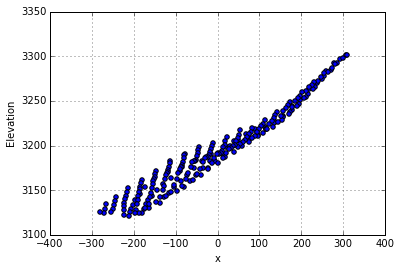

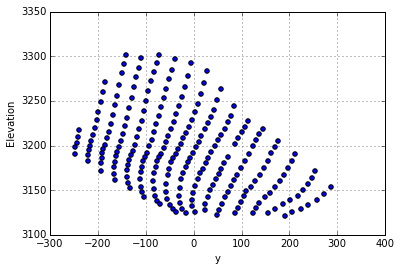

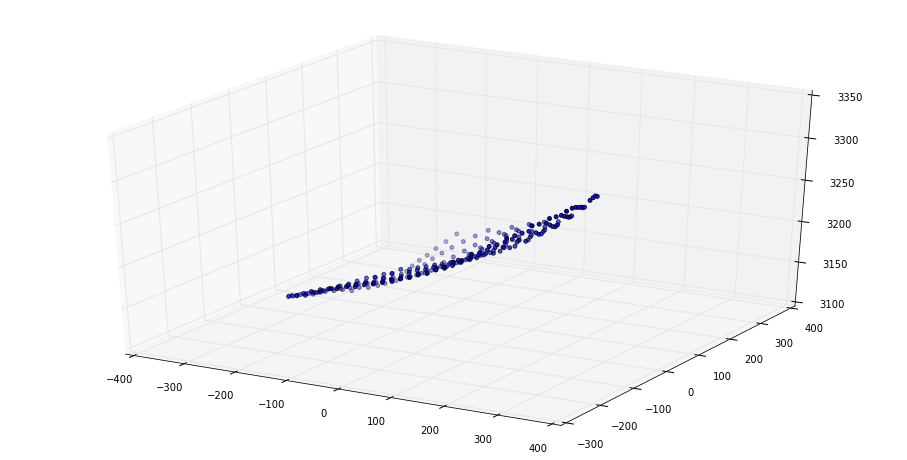

In [9]:
#gptrain.current_cohort.head()[['index', 'Elevation', 'x', 'y']]
cohort = gptrain.current_cohort
gptrain.current_cohort.plot('x', 'Elevation', kind='scatter')
gptrain.current_cohort.plot('y', 'Elevation', kind='scatter')
gt.plot3d(cohort.x, cohort.y, cohort.Elevation, cohort)

In [33]:
import matplotlib.patches as mpatches
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

COVER = ["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"]
FIELDS = ["id", "Elevation", "Aspect", "Slope", "Horizontal distance to water", "Vertical distance to water", "Horizontal distance to roadway", "Hillshade 9am", "Hillshade noon", "Hillshade 3pm", "Horizontal distance to fire points", "Wilderness Area", "Soil Type", "Cover Type"]
WILDERNESS = ["Rawah", "Neota", "Comanche Peak", "Cache La Poudra"]

In [34]:
def plot3d(c1, c2, c3, dataset=train, cts=None):
    threedee = plt.figure(figsize=(16,8)).gca(projection='3d')
    length = len(c1)
    if length < 100:
        size = 50
    elif length < 1000:
        size = 15
    else:
        size = 5
    if 'Cover_Type' in dataset:
        cover = dataset.Cover_Type.values
        ct_set = set(cover)
        cm = plt.get_cmap()
        cNorm  = matplotlib.colors.Normalize(vmin=0, vmax=max(ct_set))
        scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=cm)
        scatter_proxy = []
        labels = []
        cols = ['red', 'blue', 'green', 'red', 'blue', 'green', 'red']
        for i in ct_set:
            scatter_proxy.append(matplotlib.lines.Line2D([0],[0], linestyle="none", c=scalarMap.to_rgba(i), marker = 'o'))
            labels.append(COVER[i-1])
        threedee.legend(scatter_proxy, labels, numpoints = 1)
        plt.scatter(c1, c2, zs=c3, norm=cNorm, c=cover, s=size)
    else:
        cover = 'blue'
        plt.scatter(c1, c2, zs=c3, c=cover, s=size)
        
    #classes = COVER
    #plt.title(title)

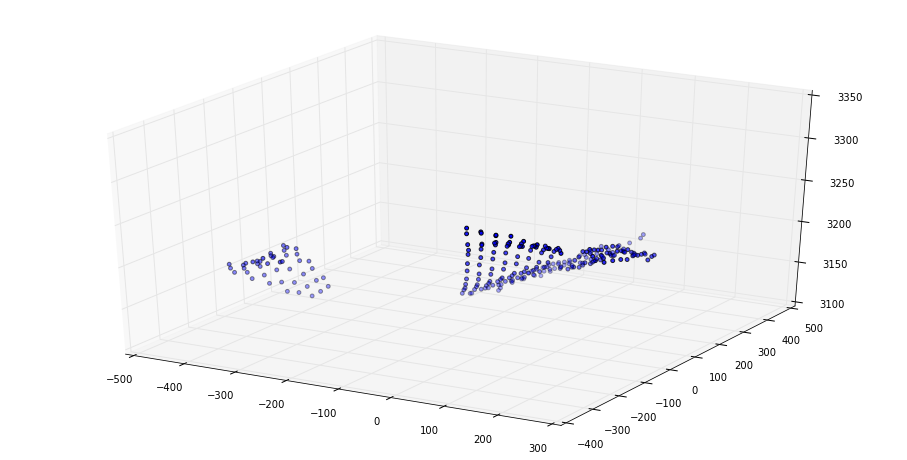

In [35]:
plot3d(gptrain.current_cohort.x, gptrain.current_cohort.y, gptrain.current_cohort.Elevation, gptrain.current_cohort)

In [6]:
def plotc(c1,c2, dataset=train, cts=None):
    fig = plt.figure(figsize=(16,8))
    cover_types = np.array(list(dataset.Cover_Type.values))
    if cts == None:
        ct_set = set(cover_types)
    else:
        ct_set = cts
    classes = COVER
    colors = ["bo", "ro", "go", "co", "mo", "yo", "ko"]
    #colors = ['b', 'c', 'y', 'm', 'r', 'g', 'k']
    
    for ct in ct_set:
        plt.plot([c1.iloc[i] for i, v in enumerate(cover_types) if v == ct], 
                 [c2.iloc[i] for i, v in enumerate(cover_types) if v == ct],
                 colors[int(ct-1)], 
                 label=COVER[int(ct-1)], alpha=.7)
        #plt.title(title)
        plt.legend(framealpha=.5, markerscale=1)

    plt.xlabel(c1.name)
    plt.ylabel(c2.name)

In [7]:
cohort = find_cohort(3245)
#plot3d(cohort.Elevation, cohort.Id, cohort.Wilderness_Area, cohort)  
plot3d(cohort.Horizontal_Distance_To_Fire_Points, cohort.Aspect, cohort.Elevation, cohort)
#Based on the above plots it appears there might 2 main 'true' cohorts in the 3245 cohort

#plot3d(cohort.Hillshade_9am, cohort.Hillshade_Noon, cohort.Hillshade_3pm, cohort)


#Based on the below plots it seems plausible they could be just 1 main 'true' cohort
#plot3d(cohort.Horizontal_Distance_To_Fire_Points, cohort.Horizontal_Distance_To_Hydrology, cohort.Elevation, cohort)
#plot3d(cohort.Horizontal_Distance_To_Fire_Points, cohort.Horizontal_Distance_To_Roadways, cohort.Elevation, cohort)
plt.show()

In [93]:
train12['Neighbors'] = train12['Id'].map(neighbor_count)

count    4320.000000
mean        5.134722
std         3.747086
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        20.000000
Name: Neighbors, dtype: float64


In [94]:
train12.Neighbors.describe()
train12.Neighbors.idxmax()

279

In [143]:
plot3d(cohort.Horizontal_Distance_To_Fire_Points, cohort.Vertical_Distance_To_Hydrology, cohort.Elevation, cohort)
plt.show()

## Gradient Descent:

In [8]:
def cost(cohort, points, fixed_points):
    #cohort of points we are trying to map to a 2d representation that fits the data
    #points are the x, y coordinates of the hypothesized points (should be len(cohort) of them)
    #fixed_points x, y coordinates of the hypothesized fire, water, road locations
    #This is not the exact same cost function the derivative of the cost function uses - this 
    #  one uses square root to make the values a little easier to think of as an average error
    #  but would unnecessarily complicate the derivative
    
    fire_d = np.sqrt((dist(points, fixed_points['fire']) - cohort.Horizontal_Distance_To_Fire_Points.values)**2)
    water_d = np.sqrt((dist(points, fixed_points['water']) - cohort.Horizontal_Distance_To_Hydrology.values)**2)
    road_d = np.sqrt((dist(points, fixed_points['road']) - cohort.Horizontal_Distance_To_Roadways.values)**2)
    return 1.0/(2*len(cohort))*(fire_d.sum() + water_d.sum() + road_d.sum())

def dist(points, fp):
    return np.sqrt((points.x - fp['x'])**2 + (points.y - fp['y'])**2)

def partial(cohort_d, points, fp):
    #finds the partial derivative of the part of the cost function relating to fp which should be
    #one of horizontal distance to fire points, water, road
    distances = dist(points, fp)
    differences = distances - cohort_d.values
    main_partial = (differences/distances)
    partial_x = main_partial*2*(points.x - fp['x'])
    partial_y = main_partial*2*(points.y - fp['y'])
    return partial_x, partial_y
    
def cost_deriv(cohort, points, fixed_points):
    fixed = {}
    f_p_x, f_p_y = partial(cohort.Horizontal_Distance_To_Fire_Points, points, fixed_points['fire'])
    fixed['fire'] = {'x': -f_p_x.sum(), 'y': -f_p_y.sum()}
    w_p_x, w_p_y = partial(cohort.Horizontal_Distance_To_Hydrology, points, fixed_points['water'])
    fixed['water'] = {'x': -w_p_x.sum(), 'y': -w_p_y.sum()}
    r_p_x, r_p_y = partial(cohort.Horizontal_Distance_To_Roadways, points, fixed_points['road'])
    fixed['road'] = {'x': -r_p_x.sum(), 'y': -r_p_y.sum()}
    partial_x = 1.0/(2*len(cohort))*(f_p_x + w_p_x + r_p_x)
    partial_y = 1.0/(2*len(cohort))*(f_p_y + w_p_y + r_p_y)
    return partial_x, partial_y, fixed
    

In [9]:
def init_points(cohort):
    #points = pd.DataFrame(np.zeros((len(cohort), 2)), columns=['x', 'y'])
    points = pd.DataFrame(100*np.random.randn(len(cohort), 2), columns=['x', 'y'])
    fixed_points = {'fire': {'x': 1, 'y':2}, 'water': {'x': 3, 'y':4}, 'road':  {'x': 5, 'y':6}}
    return points, fixed_points

In [10]:
def update_values(points, fixed_points, alpha, x_update, y_update, fp_update):
    points.x = points.x - alpha*x_update
    points.y = points.y - alpha*y_update
    fixed_points['fire']['x'] = fixed_points['fire']['x'] - alpha*fp_update['fire']['x']
    fixed_points['fire']['y'] = fixed_points['fire']['y'] - alpha*fp_update['fire']['y']
    fixed_points['water']['x'] = fixed_points['water']['x'] - alpha*fp_update['water']['x']
    fixed_points['water']['y'] = fixed_points['water']['y'] - alpha*fp_update['water']['y']
    fixed_points['road']['x'] = fixed_points['road']['x'] - alpha*fp_update['road']['x']
    fixed_points['road']['y'] = fixed_points['road']['y'] - alpha*fp_update['road']['y']
    return points, fixed_points

def iterate_hypothesis(n, cohort, alpha=.02, p=None, fp=None):
    if p is None or fp is None:
        print "initializing points"
        p, fp = init_points(cohort)
    print "Initial cost {:.2f}".format(cost(cohort, p, fp))
    digit_size = int(np.log10(n))
    print_mod = 10**(digit_size-1)
    for i in range(n):
        px, py, pfix = cost_deriv(cohort, p, fp)
        p, fp = update_values(p, fp, alpha, px, py, pfix)
        
        if (i+1)%print_mod == 0:
            c = cost(cohort, p, fp)
            print "Iteration {}: cost {:.2f}, digit count {}".format(i+1, c, int(np.log10(c+1)+1))
    return p, fp

In [133]:
def examine_results(cohort, p, fp, most=None):
    #cohort is original data set, p is hypothesized points, fp is hypothesized fire, water, road points
    if most is None:
        length = len(p)
    else:
        length = min(len(p), most)
    for i in range(length):
        fire_d = np.sqrt((p.x.iloc[i] - fp['fire']['x'])**2 + (p.y.iloc[i] - fp['fire']['y'])**2)
        water_d = np.sqrt((p.x.iloc[i] - fp['water']['x'])**2 + (p.y.iloc[i] - fp['water']['y'])**2)
        road_d = np.sqrt((p.x.iloc[i] - fp['road']['x'])**2 + (p.y.iloc[i] - fp['road']['y'])**2)
        true_f = cohort.Horizontal_Distance_To_Fire_Points.iloc[i]
        true_w = cohort.Horizontal_Distance_To_Hydrology.iloc[i]
        true_r = cohort.Horizontal_Distance_To_Roadways.iloc[i]
        print "i={} - fire: {:.0f}, water: {:.0f}, road {:.0f}".format(i, fire_d-true_f, water_d-true_w, road_d-true_r)

In [20]:
def recenter(fixed_points, points, x_amount, y_amount):
    #This may be useful (needs more testing) for helping get hypothesized points out of local minima
    #  by centering on a fixed point and reflecting problem point across it
    #Also may be useful to align overlapping cohorts
    points.x += x_amount
    points.y += y_amount
    fixed_points['fire']['x'] += x_amount
    fixed_points['fire']['y'] += y_amount
    fixed_points['water']['x'] += x_amount
    fixed_points['water']['y'] += y_amount
    fixed_points['road']['x'] += x_amount
    fixed_points['road']['y'] += y_amount

In [147]:
cohort = find_cohort(23413, test)
print len(cohort)
print len(cohort.loc[cohort.Horizontal_Distance_To_Hydrology > 0])

461
440


In [145]:
plot3d(cohort.Horizontal_Distance_To_Fire_Points, cohort.Horizontal_Distance_To_Hydrology, cohort.Elevation, cohort)
plt.show()

In [162]:
p, fp = iterate_hypothesis(10000, cohort, .002, p, fp)

Initial cost 1346.02
Iteration 1000: cost 1212.27, digit count 4
Iteration 2000: cost 1206.18, digit count 4
Iteration 3000: cost 1200.14, digit count 4
Iteration 4000: cost 1194.34, digit count 4
Iteration 5000: cost 1188.75, digit count 4
Iteration 6000: cost 1183.31, digit count 4
Iteration 7000: cost 1178.15, digit count 4
Iteration 8000: cost 1173.25, digit count 4
Iteration 9000: cost 1168.53, digit count 4
Iteration 10000: cost 1164.11, digit count 4


In [165]:
examine_results(cohort, p, fp, 500)

i=0 - fire: -194, water: -94, road -2647
i=1 - fire: -93, water: -73, road -2529
i=2 - fire: -27, water: 39, road -2316
i=3 - fire: -260, water: -140, road -2597
i=4 - fire: -97, water: -45, road -2527
i=5 - fire: -115, water: -15, road -2454
i=6 - fire: -183, water: -89, road -2586
i=7 - fire: -215, water: -92, road -2588
i=8 - fire: -192, water: -30, road -2519
i=9 - fire: -256, water: -132, road -2671
i=10 - fire: -177, water: 6, road -2603
i=11 - fire: -271, water: -64, road -2544
i=12 - fire: -259, water: -23, road -2501
i=13 - fire: -169, water: 30, road -2564
i=14 - fire: -234, water: 4, road -2568
i=15 - fire: -192, water: 84, road -2414
i=16 - fire: -476, water: -161, road -2661
i=17 - fire: -218, water: 12, road -2565
i=18 - fire: -207, water: 62, road -2520
i=19 - fire: -275, water: 32, road -2501
i=20 - fire: -368, water: -23, road -2541
i=21 - fire: -285, water: 125, road -2462
i=22 - fire: -157, water: 150, road -2486
i=23 - fire: -277, water: 65, road -2528
i=24 - fire: 

In [152]:
recenter(fp, pn, -fp['fire']['x'], -fp['fire']['y'])
pn.loc[8, 'x'] = -pn.loc[8, 'x']
#print p.loc[5] #-219, 381
#print p.loc[7] #84, 174
#p.loc[5, 'x'] = 200
#p.loc[5, 'y'] = -399
#p.loc[7, 'x'] = -84
#p.loc[7, 'y'] = -174
#cohort.iloc[1:]['x'] = pn.x.values
#cohort.iloc[1:]['y'] = pn.y.values
#c = cohort.iloc[1:]

In [168]:
cohort['x'] = p.x.values
cohort['y'] = p.y.values
#print c.head()

In [111]:
plotc(c.x, c.y, c)
plt.show()

In [170]:
plot3d(cohort.Horizontal_Distance_To_Fire_Points, cohort.Horizontal_Distance_To_Hydrology, cohort.Elevation, cohort)
plt.show()

In [169]:
plot3d(cohort.x, cohort.y, cohort.Elevation, cohort)
plt.show()

In [52]:
#plt.figure(121)
#plt.scatter([points.x.loc[6]], [points.y.loc[6]], marker='o')#, c=range(0, len(points)))
#plt.scatter(points.x, points.y, c=range(0, len(p)), marker='o')
#plt.figure(122)
#plt.scatter([p.x.loc[6]], [p.y.loc[6]], marker='x')#, c=range(0, len(p)))
plt.scatter(pn.x, pn.y, c=range(0, len(pn)), marker='x')
plt.scatter([fp['fire']['x']], [fp['fire']['y']], c='red', marker='x', s=150)
plt.scatter([fp['water']['x']], [fp['water']['y']], c='blue', marker='x', s=150)
plt.scatter([fp['road']['x']], [fp['road']['y']], c='black', marker='x', s=150)

plt.show()


In [53]:
print cohort.head()

        Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
Id                                                                       
3051  3051       2314     321     23                                67   
3124  3124       2340     309     25                               192   
3125  3125       2354     219      9                               212   
3154  3154       2352       0      5                               201   
3155  3155       2348     192      9                               234   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
Id                                                                      
3051                              20                              927   
3124                              46                             1101   
3125                              60                              876   
3154                              58                              942   
3155                              54       

### The Results:

In [41]:
cohort['x'] = p.x.values
cohort['y'] = p.y.values
plot3d(cohort.x, cohort.y, cohort.Elevation, cohort)
plt.show()

In [39]:
print len(p)
print len(df)

109
12
